<a href="https://colab.research.google.com/github/Jackil1993/GPT3_SCM/blob/main/single_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

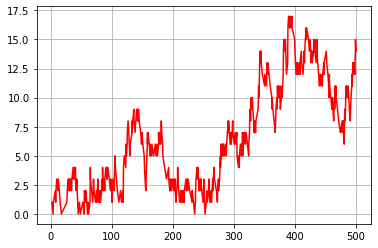

In [1]:
from numpy import random 
import matplotlib.pyplot as plt
def interarrival():
    return random.exponential(2.)
def service():
    tmp = random.normal(2., 1)
    while tmp < 0:
      tmp = random.normal(2., 1)
    return tmp
time = 0.0 
arr = interarrival()
dep = float('inf')
queue = []
timings = []
queues = []
def arrival():
    global queue, arr, dep, time
    time = arr
    arr = time + interarrival()
    if len(queue) == 0:
        dep = time + service()
    queue.append(0)
def departure():
    global queue, arr, dep, time 
    time = dep 
    queue.pop(0)
    if len(queue) == 0:
        dep = float('inf')
    else:
        dep = time + service() 
def advance_time():
    global queue, arr, dep, time, timings, queues 
    if arr <= dep:
        arrival()
    else:
        departure()
    timings.append(time)
    queues.append(len(queue))
def simulation(end_time):
    global time
    while time < end_time:
        advance_time()
simulation(500)
plt.plot(timings, queues, color='red')
plt.grid()
plt.show()